In [62]:
import pandas as pd
import spacy
import textacy
import os
import logging
HOME = os.getcwd()
df = pd.read_csv(os.path.join(HOME, 'ethics_statement_frontiers_100.csv'), usecols = ['parsed'], nrows=10)
#preproc = textacy.preprocessing.make_pipeline(textacy.preprocessing.normalize.unicode,textacy.preprocessing.normalize.quotation_marks,textacy.preprocessing.normalize.whitespace)
#preproc_records = ((preproc(text), meta) for text, meta in records)
parsed_paragraphs = df.parsed.to_list()
corpus = textacy.Corpus("en_core_web_sm", data=parsed_paragraphs)
print(corpus)

Corpus(10 docs, 465 tokens)


In [63]:
from functools import partial
for doc in corpus:
    terms = list(textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=2, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={"PERSON", "ORG", "GPE", "LOC"})))
print(terms)
for term in terms:
    tokenized_docs = (textacy.extract.terms_to_strings(terms, by="lemma"))
tokenized_docs

[Ethical review, human participants, local legislation, institutional requirements, informed consent, informed consent, identifiable images]


<generator object terms_to_strings at 0x000002111275D970>

In [64]:
import textacy.representations
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs, tf_type="linear", idf_type="smooth")
doc_term_matrix

<7x22 sparse matrix of type '<class 'numpy.float64'>'
	with 82 stored elements in Compressed Sparse Row format>

In [65]:
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=10)
model.fit(doc_term_matrix)

c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [66]:
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape

doc_topic_matrix

array([[1.39898843, 0.00908671, 0.        , 0.        , 0.        ,
        0.        , 2.42123198, 0.        , 0.00407212, 0.        ],
       [0.        , 3.18598383, 0.        , 0.        , 0.06088759,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.91478362, 0.00653238, 0.03786822, 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.90354527, 0.        ],
       [1.20508706, 0.01530925, 0.07263908, 0.        , 3.18588653,
        0.        , 0.        , 0.        , 0.03341982, 0.        ],
       [0.00402546, 0.        , 2.34472635, 0.00660663, 0.0228439 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00402546, 0.        , 2.34472635, 0.00660663, 0.0228439 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.54984735, 0.00672782, 0.03627853, 2.59257591, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [68]:
id_to_term = {id_: term for term, id_ in vocab.items()}
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=8):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

topic 0: i   e   l   a   t       n   b
topic 1: p   a   n   h   i   t   u   c
topic 2: n   o   e   f   d   s   c   m
topic 3: b   g   i   d   f   e   a   m
topic 4: u   n   t   r   q   i   e   s
topic 5: w   v   a   b   c   d   e   f
topic 6: w   v   h   e   r   c   l   i
topic 7: w   v   a   b   c   d   e   f
topic 8: l   o   g   a   s   c   n   i
topic 9: w   v   a   b   c   d   e   f


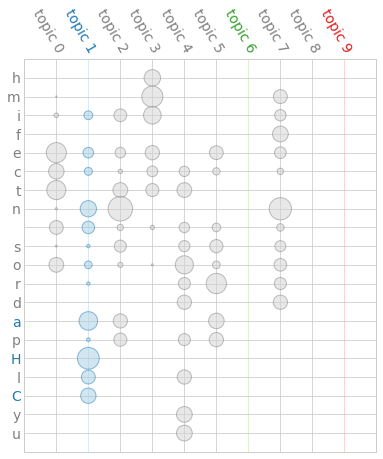

In [53]:
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=30, highlight_topics=[1, 6, 9])

In [60]:
import textacy
vectorizer = textacy.vsm.Vectorizer(apply_idf=True, norm=None, idf_type='standard')
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)
print (doc_term_matrix.toarray())

AttributeError: module 'textacy' has no attribute 'vsm'